<a href="https://colab.research.google.com/github/ChargeZoo/2012645-/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B3%BC%EC%A0%9C1_2012645_%EC%A0%84%ED%95%98%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 실습 과제 1. Lab 0 Broadcasting: Multiply a tensor by a set of constants에서 multiplication 예제를 addition으로 수정하세요.

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
c = torch.tensor([1, 10, 11, 100])        # c has shape (4)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(c)


y = c.view(-1, 1, 1) + x
print('\nadd x by a set of constants:')
print(y)

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([  1,  10,  11, 100])

add x by a set of constants:
tensor([[[  2,   3,   4],
         [  5,   6,   7]],

        [[ 11,  12,  13],
         [ 14,  15,  16]],

        [[ 12,  13,  14],
         [ 15,  16,  17]],

        [[101, 102, 103],
         [104, 105, 106]]])


## 실습 과제 2. Lab 1 Universal Approximation Theorem에서 L2대신 L1 regularization으로 학습시키고 결과를 비교 논의하세요.

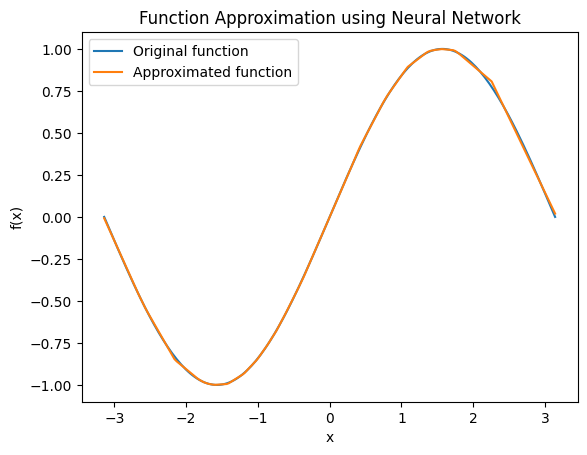

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y = torch.sin(x)

# Neural network definition
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Model instantiation
model = Net(hidden_size=50)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 2000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Results visualization
with torch.no_grad():
    predicted = model(x).detach().numpy()

# Original vs Approximated function plot
plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predicted, label='Approximated function')
plt.legend()
plt.title('Function Approximation using Neural Network')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

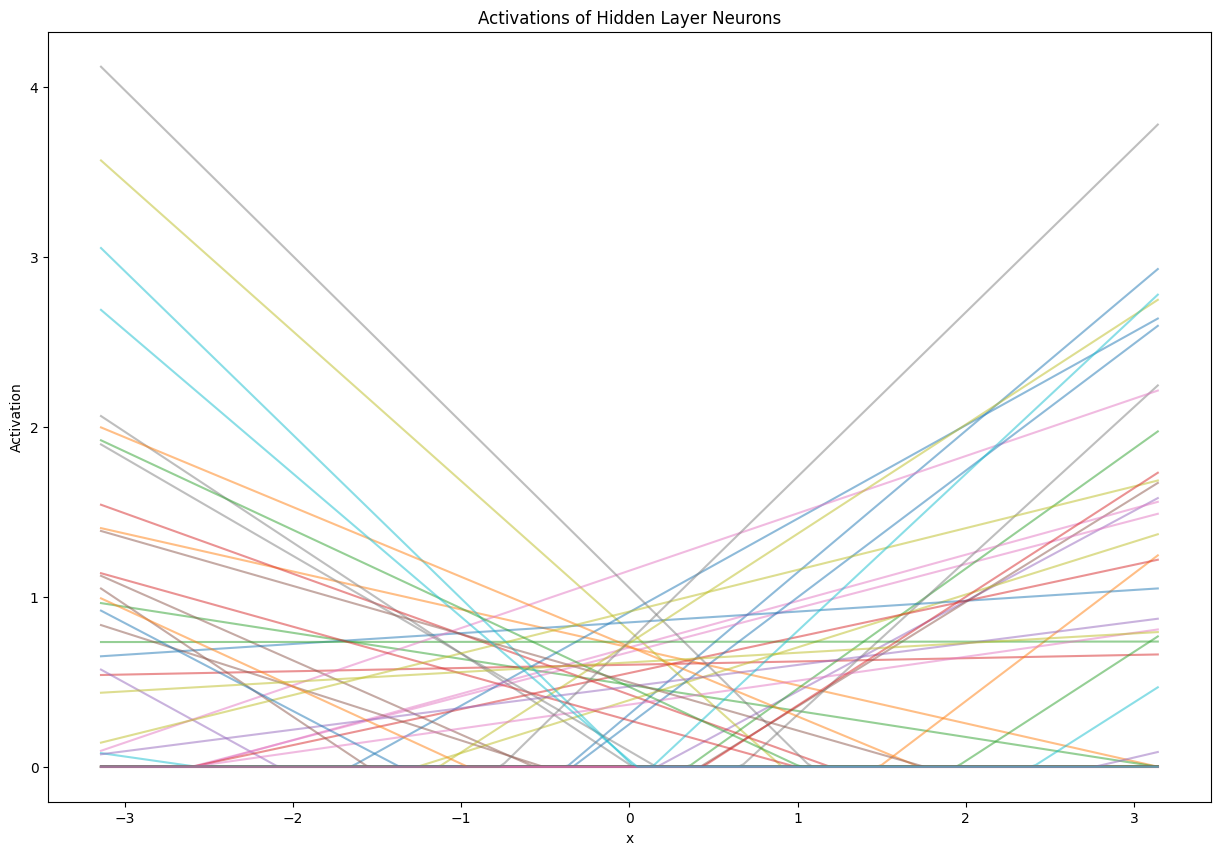

In [ ]:
# Re-importing necessary libraries and re-defining classes and functions after reset
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)

# Original neural network definition for reference
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Modified neural network definition for activation extraction
class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = torch.relu(self.fc1(x))
        output = self.fc2(activations)
        return output, activations

# Training setup
model = Net(hidden_size=50)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
y = torch.sin(x)
epochs = 2000
for epoch in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Extract activations
model_with_activations = NetWithActivations(hidden_size=50)
model_with_activations.load_state_dict(model.state_dict())

with torch.no_grad():
    _, activations = model_with_activations.forward_with_activations(x)

# Visualizing activations
plt.figure(figsize=(15, 10))
for i in range(activations.size(1)):  # For each neuron in the hidden layer
    plt.plot(x.numpy(), activations[:, i].numpy(), alpha=0.5)

plt.title('Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Activation')
plt.show()


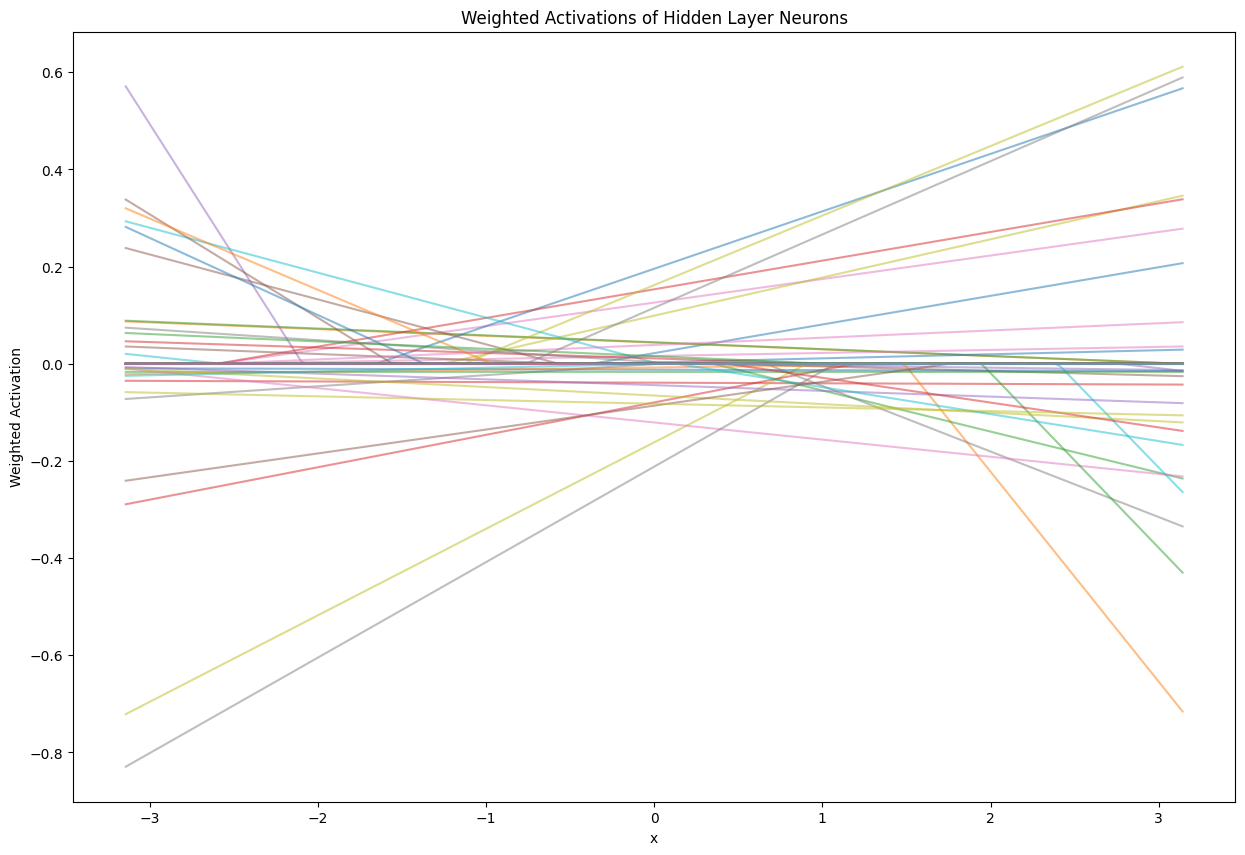

In [ ]:
# Assuming model_with_activations is already defined and has the trained weights

with torch.no_grad():
    _, activations = model_with_activations.forward_with_activations(x)

# Get the weights from the hidden layer to the output
weights_to_output = model_with_activations.fc2.weight.detach()

# Compute weighted activations
weighted_activations = activations * weights_to_output

# Visualizing weighted activations
plt.figure(figsize=(15, 10))
for i in range(weighted_activations.size(1)):
    plt.plot(x.numpy(), weighted_activations[:, i].numpy(), alpha=0.5)

plt.title('Weighted Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Weighted Activation')
plt.show()

In [ ]:
def train_model_with_regularization(model, criterion, optimizer, x, y, epochs=2000, l1_lambda=0.01):
    for epoch in range(epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)

        # L1 Regularization
        l1_reg = torch.tensor(0., requires_grad=True)
        for param in model.parameters():
            l1_reg = l1_reg + torch.norm(param, 1)

        loss = loss + l1_lambda * l1_reg

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


In [ ]:
model_with_reg = NetWithActivations(hidden_size=50)
optimizer_with_reg = torch.optim.Adam(model_with_reg.parameters(), lr=0.01, weight_decay=0.01)  # Including L1 regularization
train_model_with_regularization(model_with_reg, criterion, optimizer_with_reg, x, y)

Epoch [100/2000], Loss: 0.2318
Epoch [200/2000], Loss: 0.1530
Epoch [300/2000], Loss: 0.1190
Epoch [400/2000], Loss: 0.1104
Epoch [500/2000], Loss: 0.1091
Epoch [600/2000], Loss: 0.1090
Epoch [700/2000], Loss: 0.1090
Epoch [800/2000], Loss: 0.1091
Epoch [900/2000], Loss: 0.1090
Epoch [1000/2000], Loss: 0.1092
Epoch [1100/2000], Loss: 0.1091
Epoch [1200/2000], Loss: 0.1092
Epoch [1300/2000], Loss: 0.1093
Epoch [1400/2000], Loss: 0.1092
Epoch [1500/2000], Loss: 0.1091
Epoch [1600/2000], Loss: 0.1093
Epoch [1700/2000], Loss: 0.1093
Epoch [1800/2000], Loss: 0.1093
Epoch [1900/2000], Loss: 0.1092
Epoch [2000/2000], Loss: 0.1093


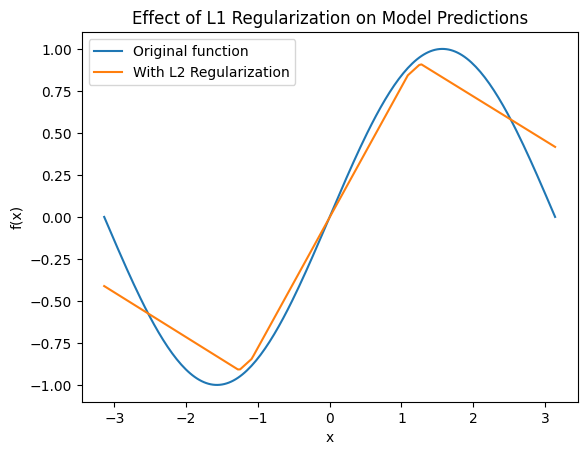

In [ ]:
with torch.no_grad():

    predictions_with_reg = model_with_reg(x).detach().numpy()

plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predictions_with_reg, label='With L2 Regularization')
plt.legend()
plt.title('Effect of L1 Regularization on Model Predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# 실습 과제 3. Lab 1 Universal Approximation Theorem에서 ReLU이외의 다른 activation function으로 학습시켜보고 결과를 논의하세요.

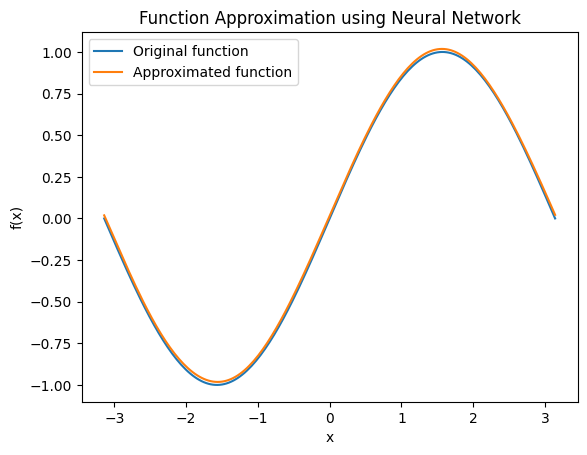

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y = torch.sin(x)

# Neural network definition
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Model instantiation
model = Net(hidden_size=50)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 2000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Results visualization
with torch.no_grad():
    predicted = model(x).detach().numpy()

# Original vs Approximated function plot
plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predicted, label='Approximated function')
plt.legend()
plt.title('Function Approximation using Neural Network')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

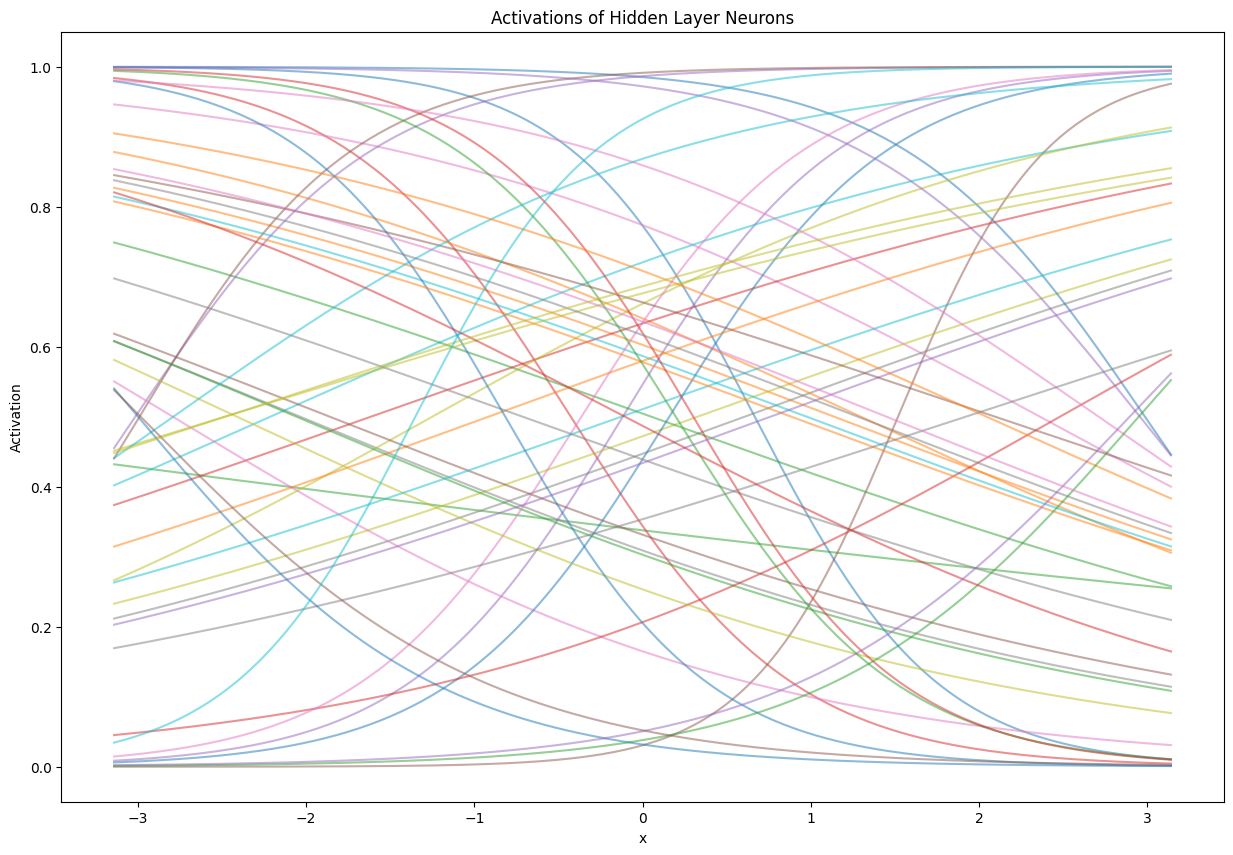

In [ ]:

# Re-importing necessary libraries and re-defining classes and functions after reset
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)

# Original neural network definition for reference
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Modified neural network definition for activation extraction
class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = torch.sigmoid(self.fc1(x))
        output = self.fc2(activations)
        return output, activations

# Training setup
model = Net(hidden_size=50)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
y = torch.sin(x)
epochs = 2000
for epoch in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Extract activations
model_with_activations = NetWithActivations(hidden_size=50)
model_with_activations.load_state_dict(model.state_dict())

with torch.no_grad():
    _, activations = model_with_activations.forward_with_activations(x)

# Visualizing activations
plt.figure(figsize=(15, 10))
for i in range(activations.size(1)):  # For each neuron in the hidden layer
    plt.plot(x.numpy(), activations[:, i].numpy(), alpha=0.5)

plt.title('Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Activation')
plt.show()

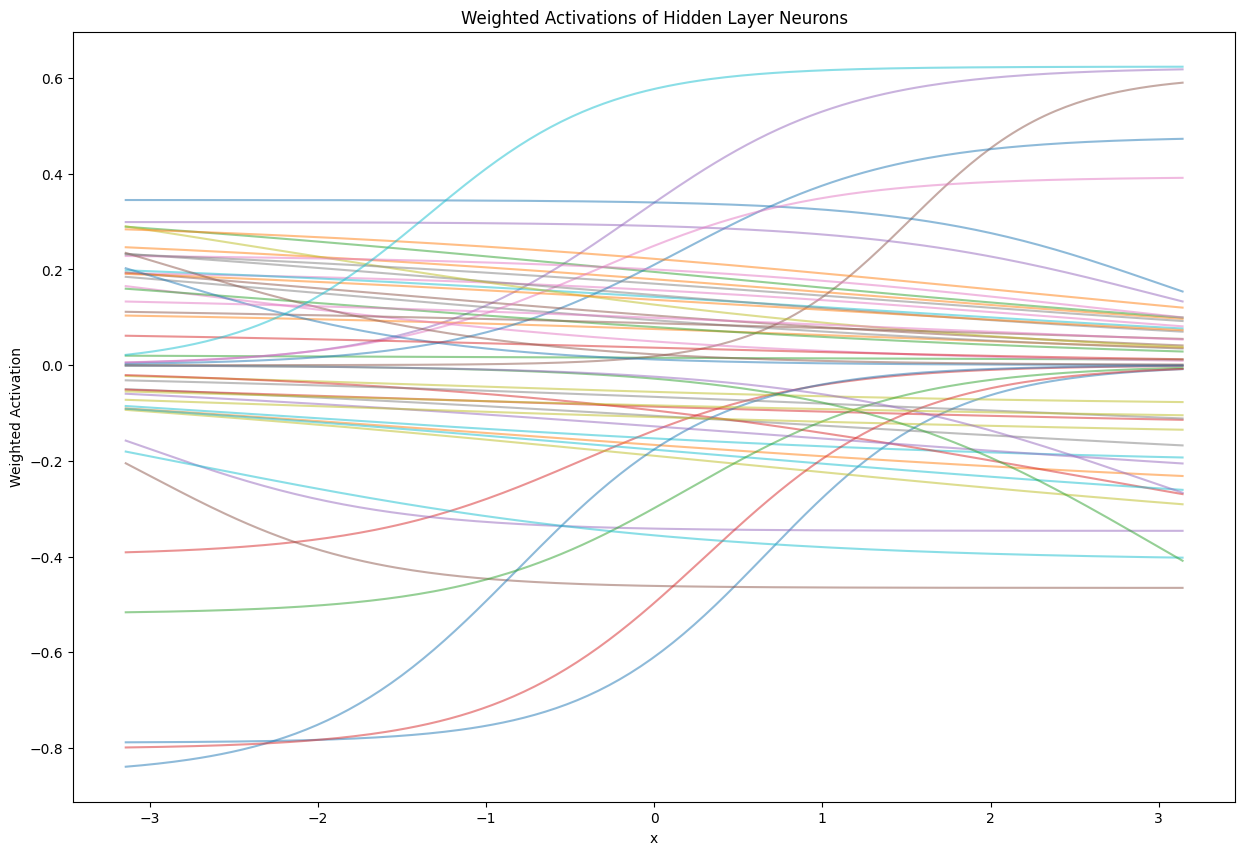

In [ ]:

# Assuming model_with_activations is already defined and has the trained weights

with torch.no_grad():
    _, activations = model_with_activations.forward_with_activations(x)

# Get the weights from the hidden layer to the output
weights_to_output = model_with_activations.fc2.weight.detach()

# Compute weighted activations
weighted_activations = activations * weights_to_output

# Visualizing weighted activations
plt.figure(figsize=(15, 10))
for i in range(weighted_activations.size(1)):
    plt.plot(x.numpy(), weighted_activations[:, i].numpy(), alpha=0.5)

plt.title('Weighted Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Weighted Activation')
plt.show()


In [ ]:
def train_model_with_regularization(model, criterion, optimizer, x, y, epochs=2000, weight_decay=0.01):
    for epoch in range(epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)

        # L2 Regularization is automatically applied through optimizer's weight_decay parameter
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

In [ ]:

# Model without regularization
model_no_reg = NetWithActivations(hidden_size=50)
optimizer_no_reg = torch.optim.Adam(model_no_reg.parameters(), lr=0.01)
train_model_with_regularization(model_no_reg, criterion, optimizer_no_reg, x, y, epochs=2000, weight_decay=0)

# Model with regularization
model_with_reg = NetWithActivations(hidden_size=50)
optimizer_with_reg = torch.optim.Adam(model_with_reg.parameters(), lr=0.01, weight_decay=0.01)  # Including L2 regularization
train_model_with_regularization(model_with_reg, criterion, optimizer_with_reg, x, y, epochs=2000, weight_decay=0.01)


Epoch [100/2000], Loss: 0.0650
Epoch [200/2000], Loss: 0.0138
Epoch [300/2000], Loss: 0.0100
Epoch [400/2000], Loss: 0.0068
Epoch [500/2000], Loss: 0.0037
Epoch [600/2000], Loss: 0.0013
Epoch [700/2000], Loss: 0.0003
Epoch [800/2000], Loss: 0.0001
Epoch [900/2000], Loss: 0.0001
Epoch [1000/2000], Loss: 0.0000
Epoch [1100/2000], Loss: 0.0000
Epoch [1200/2000], Loss: 0.0000
Epoch [1300/2000], Loss: 0.0000
Epoch [1400/2000], Loss: 0.0000
Epoch [1500/2000], Loss: 0.0001
Epoch [1600/2000], Loss: 0.0000
Epoch [1700/2000], Loss: 0.0000
Epoch [1800/2000], Loss: 0.0000
Epoch [1900/2000], Loss: 0.0000
Epoch [2000/2000], Loss: 0.0000
Epoch [100/2000], Loss: 0.1518
Epoch [200/2000], Loss: 0.0802
Epoch [300/2000], Loss: 0.0456
Epoch [400/2000], Loss: 0.0315
Epoch [500/2000], Loss: 0.0261
Epoch [600/2000], Loss: 0.0238
Epoch [700/2000], Loss: 0.0227
Epoch [800/2000], Loss: 0.0222
Epoch [900/2000], Loss: 0.0220
Epoch [1000/2000], Loss: 0.0218
Epoch [1100/2000], Loss: 0.0217
Epoch [1200/2000], Loss: 0

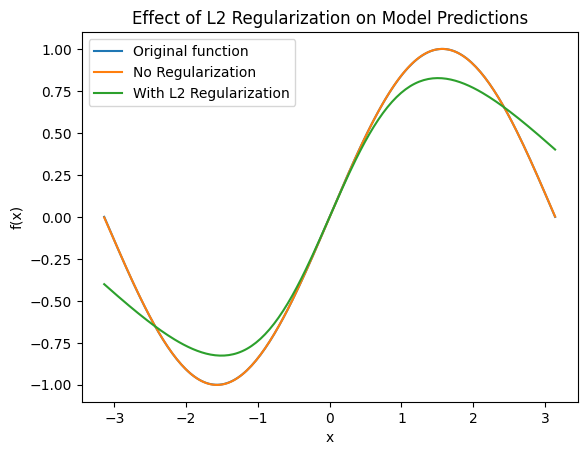

In [ ]:

with torch.no_grad():
    predictions_no_reg = model_no_reg(x).detach().numpy()
    predictions_with_reg = model_with_reg(x).detach().numpy()

plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predictions_no_reg, label='No Regularization')
plt.plot(x.numpy(), predictions_with_reg, label='With L2 Regularization')
plt.legend()
plt.title('Effect of L2 Regularization on Model Predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


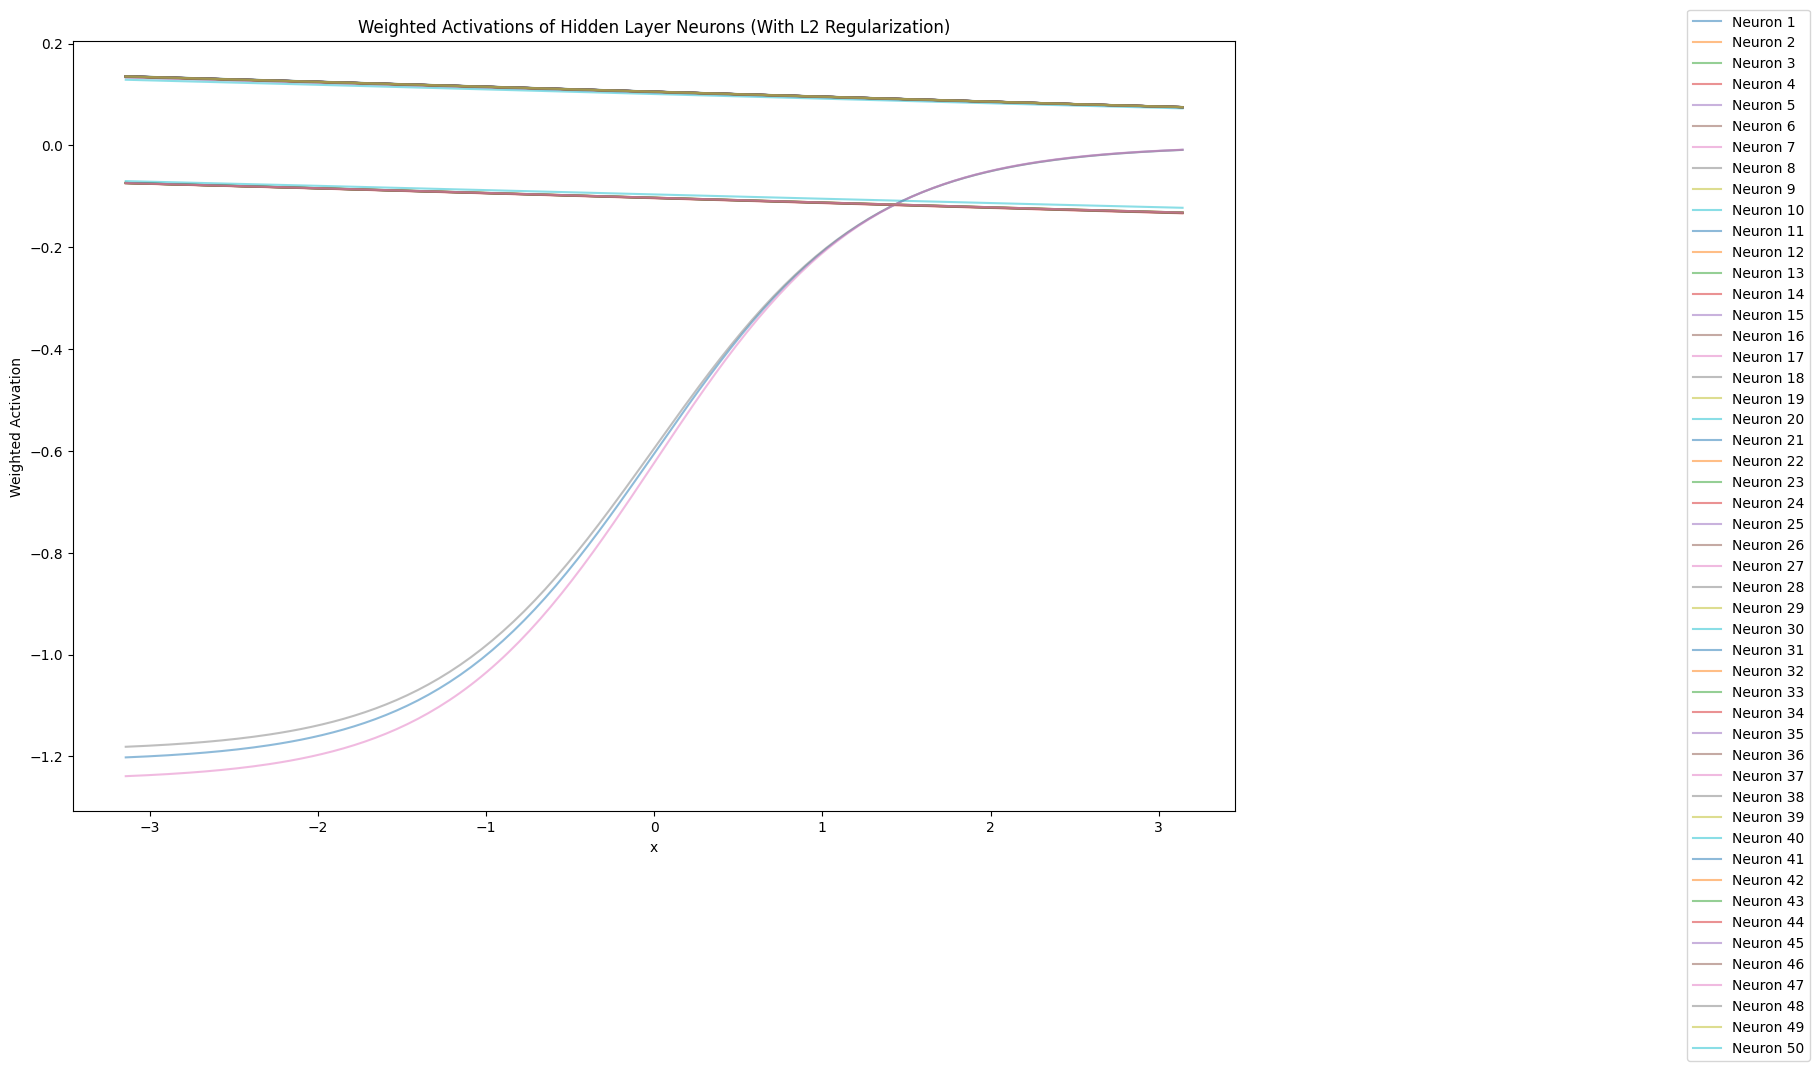

In [ ]:

with torch.no_grad():
    _, activations_with_reg = model_with_reg.forward_with_activations(x)
weights_to_output_reg = model_with_reg.fc2.weight.detach()

# Compute weighted activations for the regularized model
weighted_activations_with_reg = activations_with_reg * weights_to_output_reg.T.view(-1)

plt.figure(figsize=(15, 10))
for i in range(weighted_activations_with_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')

plt.title('Weighted Activations of Hidden Layer Neurons (With L2 Regularization)')
plt.xlabel('x')
plt.ylabel('Weighted Activation')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.05))
plt.show()

## 실습 과제 4. Lab 1 ANN for MNIST에서 모델을 hinge loss (SVM loss)로 학습시켜보고 결과를 논의하세요.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations applied on each image
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Loading the MNIST dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Data loaders for the training and test set
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Define the MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 100)  # First layer (input to hidden)
        self.fc2 = nn.Linear(100, 10)     # Second layer (hidden to output)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # ReLU activation function
        x = self.fc2(x)  # No activation, output raw scores
        return x

# Training with SVM Loss
print("Training with SVM Loss:")
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

epochs = 10  # Run for 10 epochs

# Training loop
model.train()
for epoch in range(epochs):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        # SVM Loss calculation
        correct_scores = output[range(len(target)), target].unsqueeze(1)
        margins = output - correct_scores + 1
        margins = torch.clamp(margins, min=0)
        margins[range(len(target)), target] = 0  # Exclude correct class margins
        loss = margins.mean()
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Evaluation loop
model.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max logit
        correct += pred.eq(target.view_as(pred)).sum().item()

accuracy = 100. * correct / len(test_loader.dataset)
print(f'Accuracy: {accuracy}%')

Training with SVM Loss:
Epoch 1, Loss: 0.033271096646785736
Epoch 2, Loss: 0.014034921303391457
Epoch 3, Loss: 0.004892497789114714
Epoch 4, Loss: 0.0028802775777876377
Epoch 5, Loss: 0.0008973106741905212
Epoch 6, Loss: 0.005582430865615606
Epoch 7, Loss: 0.0032018341589719057
Epoch 8, Loss: 0.0005242362385615706
Epoch 9, Loss: 0.004039333201944828
Epoch 10, Loss: 0.015647104009985924
Accuracy: 97.55%


## 실습 과제 5. Lab 1 ANN for MNIST에서 모델을 nn module이 아닌 barebone function만으로 같은 기능을 구현하세요.

In [ ]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations applied on each image
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Loading the MNIST dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Data loaders for the training and test set
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Define the MLP Model using barebone functions
def mlp(x, weights, biases):
    x = x.view(-1, 28*28)  # Flatten the image
    x = torch.relu(torch.matmul(x, weights[0]) + biases[0])  # ReLU activation function
    x = torch.matmul(x, weights[1]) + biases[1]  # No activation, output raw scores
    return x

# Initialize weights and biases with requires_grad=True
weights = [torch.randn(28*28, 100, requires_grad=True), torch.randn(100, 10, requires_grad=True)]
biases = [torch.zeros(100, requires_grad=True), torch.zeros(10, requires_grad=True)]

# Training with Cross Entropy Loss
print("Training with Cross Entropy Loss:")
optimizer = optim.SGD([weights[0], weights[1], biases[0], biases[1]], lr=0.01, momentum=0.9)

epochs = 10  # Run for 10 epochs
# Training loop
for epoch in range(epochs):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = mlp(data, weights, biases)
        loss = torch.nn.functional.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Evaluation loop
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = mlp(data, weights, biases)
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

accuracy = 100. * correct / len(test_loader.dataset)
print(f'Accuracy: {accuracy}%')


100%|██████████| 9912422/9912422 [00:00<00:00, 77002895.30it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 65798855.96it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 24868987.70it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11817945.89it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training with Cross Entropy Loss:
Epoch 1, Loss: 2.147066116333008
Epoch 2, Loss: 0.6717234253883362
Epoch 3, Loss: 0.44691261649131775
Epoch 4, Loss: 0.4698212444782257
Epoch 5, Loss: 1.9077004194259644
Epoch 6, Loss: 0.4449288249015808
Epoch 7, Loss: 1.0032958984375
Epoch 8, Loss: 0.42695897817611694
Epoch 9, Loss: 0.18789812922477722
Epoch 10, Loss: 0.3037363588809967
Accuracy: 90.64%


## 실습 과제 6. 다음 x와 w의 matrix multiplication을 수행하고자 할 때, GPU 사용과 CPU 사용시 수행시간을 비교하세요.
x = torch.rand(512, 4096)
w = torch.rand(4096, 4096)

In [1]:
import torch
import time

# GPU를 사용할지 여부를 결정, CUDA가 사용 가능한 경우 True로 설정
use_cuda = torch.cuda.is_available()

# 행렬 x와 w를 생성
x = torch.rand(512, 4096)
w = torch.rand(4096, 4096)

# GPU를 사용하여 연산을 수행
if use_cuda:
    # x와 w를 GPU로 이동
    x = x.cuda()
    w = w.cuda()

    # 연산을 수행하기 전에 GPU에 데이터를 올리는 시간을 측정
    start_time = time.time()

    # x와 w의 행렬 곱셈을 수행
    result = torch.mm(x, w)

    # 연산이 완료된 후에 소요된 전체 시간을 측정
    end_time = time.time()

    # GPU에서 수행된 시간을 계산
    gpu_time = end_time - start_time

    print("행렬 곱셈이 GPU에서 완료되었습니다.")
    print("GPU에서의 소요 시간:", gpu_time, "초")
else:
    print("CUDA를 사용할 수 없습니다. CPU에서 코드를 실행합니다.")

행렬 곱셈이 GPU에서 완료되었습니다.
GPU에서의 소요 시간: 0.1322629451751709 초


In [ ]:
import torch
import time

# 행렬 x와 w 생성
x = torch.rand(512, 4096)
w = torch.rand(4096, 4096)

# 연산을 수행하기 전에 CPU에서 데이터를 처리하는 시간을 측정
start_time = time.time()

# x와 w의 행렬 곱셈을 수행
result = torch.mm(x, w)

# 연산이 완료된 후에 소요된 전체 시간을 측정.
end_time = time.time()

# CPU에서 수행된 시간을 계산
cpu_time = end_time - start_time

print("행렬 곱셈이 CPU에서 완료되었습니다.")
print("CPU에서의 소요 시간:", cpu_time, "초")


행렬 곱셈이 CPU에서 완료되었습니다.
CPU에서의 소요 시간: 0.5860295295715332 초


## 실습 과제 7. 수업에서 설명한 Logistic Regression (Linear Classifier)과 ANN으로 각각 CIFAR10 데이터를 학습시키고 이미지와 곱해지는 weight들을 이미지 형태로 시각화 하여 비교하세요.

Logistic Regression (Linear Classifier)

Files already downloaded and verified
Files already downloaded and verified


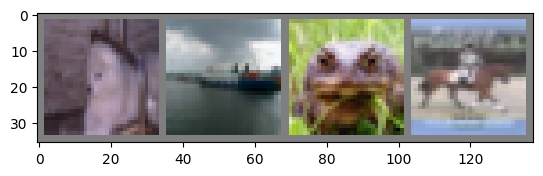

GroundTruth:    dog  ship  frog horse


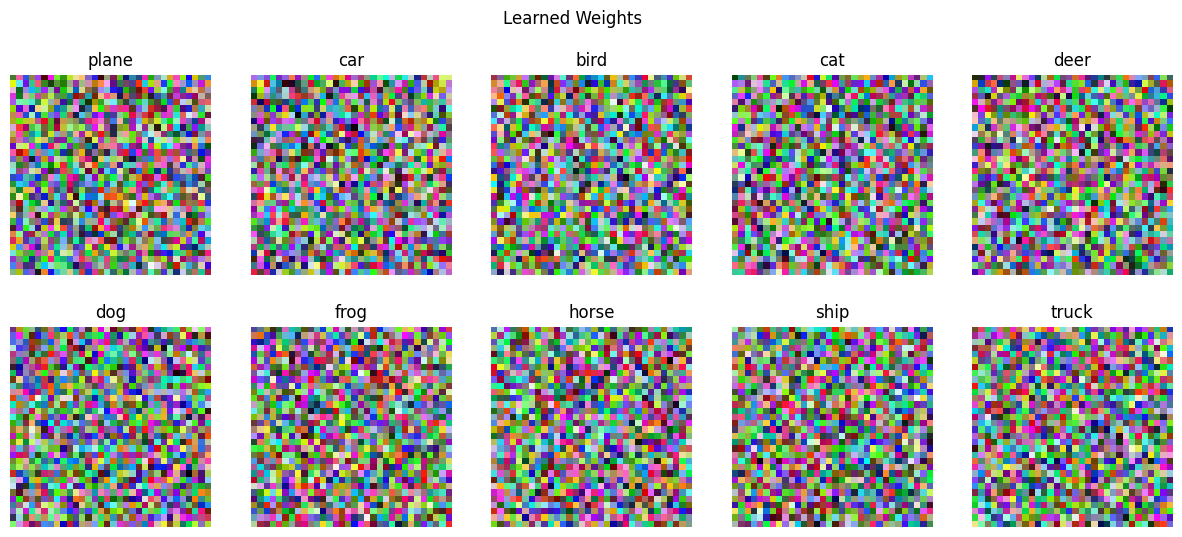

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np  # np 모듈 임포트 추가

# CIFAR10 데이터셋을 로드하고 정규화합니다.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 이미지를 보여주는 함수
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# CIFAR10 데이터셋을 로드하고 정규화합니다.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 이미지를 보여주는 함수
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 학습 데이터를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지를 보여주고 정답(label) 출력
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Logistic Regression 모델 정의
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(3 * 32 * 32, 10)  # CIFAR10 이미지 크기는 32x32x3이므로 input feature는 3*32*32

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # 이미지를 벡터로 변환
        return self.linear(x)

# 모델 초기화
model = LogisticRegression()

# 학습된 가중치(weight)를 시각화하는 함수 수정
def visualize_weights(model):
    weights = model.linear.weight.data
    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('Learned Weights')

    for i in range(10):
        img = weights[i].view(3, 32, 32).cpu().detach().numpy()
        img = (img - img.min()) / (img.max() - img.min())  # 정규화
        axs[i // 5, i % 5].imshow(np.transpose(img, (1, 2, 0)))  # 텐서의 차원 순서 변경하여 이미지 표시
        axs[i // 5, i % 5].set_title(classes[i])
        axs[i // 5, i % 5].axis('off')

    plt.show()

# 학습된 가중치 시각화
visualize_weights(model)


ANN

Files already downloaded and verified


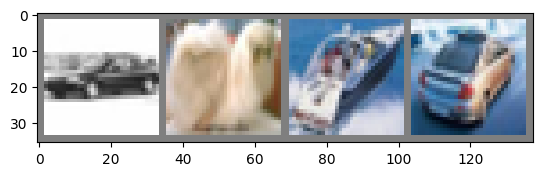

GroundTruth:    car   dog  ship   car
[1,  2000] loss: 1.927
[1,  4000] loss: 1.722
[1,  6000] loss: 1.655
[1,  8000] loss: 1.621
[1, 10000] loss: 1.599
[1, 12000] loss: 1.554
[2,  2000] loss: 1.487
[2,  4000] loss: 1.497
[2,  6000] loss: 1.458
[2,  8000] loss: 1.482
[2, 10000] loss: 1.450
[2, 12000] loss: 1.437
Finished Training


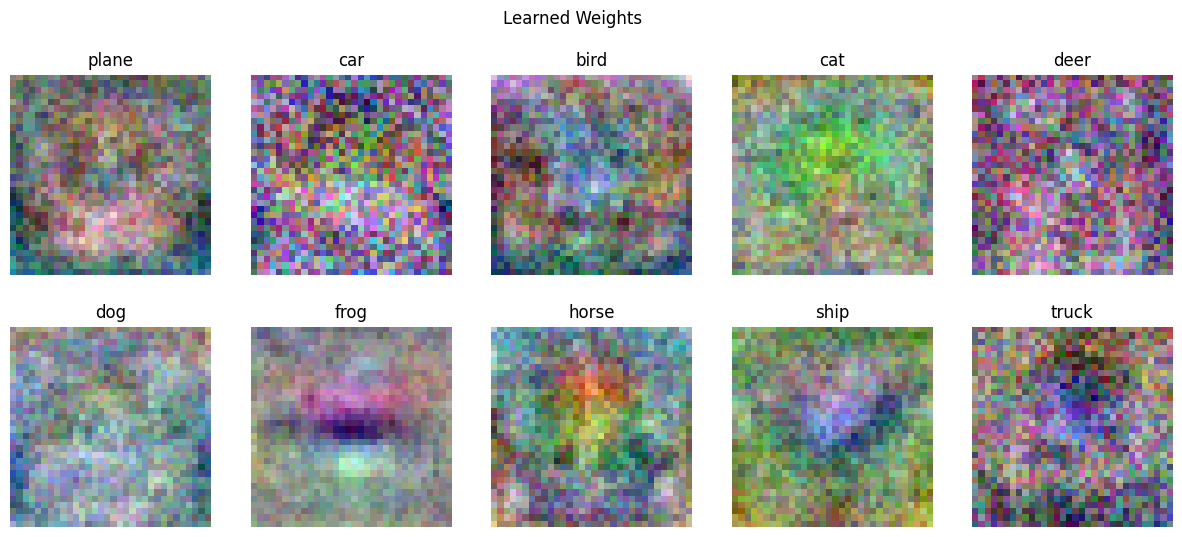

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# CIFAR10 데이터셋을 로드하고 정규화합니다.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 이미지를 보여주는 함수
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 학습 데이터를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지를 보여주고 정답(label) 출력
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 인공신경망(ANN) 모델 정의
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 초기화
model = ANN()

# 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 모델 학습
for epoch in range(2):  # 데이터셋을 여러번 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 입력을 받은 후
        inputs, labels = data

        # 변화도(Gradient) 매개변수를 0으로 만든 후
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력
        running_loss += loss.item()
        if i % 2000 == 1999:    # 매 2000 미니배치마다 출력합니다.
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# 학습된 가중치를 시각화하는 함수
def visualize_weights(model):
    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('Learned Weights')

    for i in range(10):
        img = model.fc1.weight[i].view(3, 32, 32).cpu().detach().numpy()
        img = (img - img.min()) / (img.max() - img.min())  # 정규화
        axs[i // 5, i % 5].imshow(np.transpose(img, (1, 2, 0)))  # 텐서의 차원 순서 변경하여 이미지 표시
        axs[i // 5, i % 5].set_title(classes[i])
        axs[i // 5, i % 5].axis('off')

    plt.show()

# 학습된 가중치 시각화
visualize_weights(model)
